## Analyze AQUASTAT dataset for Egypt water consumption

This project will analyze water consumption in Egypt

## Table of Contents
- [Introduction](#intro)
- [Part I - Exploratory analysis](#Exploratory_analysis)
- [Part II - Data Cleaning](#Data_Cleaning)
- [Part III - Explanatory Data Analysis](#ExplanatoryDataAnalysis)



<a id='intro'></a>
### Introduction

This project will analyze water consumption in egypt, we will try to answer those questions:
1. What is the resources for water in Egypt?
2. What is the water withdrawal in agricultural, industrial, municipal compared to each other in Egypt?
3. How much water we use in agriculture's products?
4. How much rainfall water, flood and groundwater we use and How we can store it?
5. How pollution affects water consumption?


<a id='Exploratory_analysis'></a>
#### Part I - Exploratory analysis

import our libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


`1.` Now, read in the `aquastat.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read the dataset,and print the top few rows
df=pd.read_csv('Omdena/Egypt-LocalChapter/Water-Consumption/omdena-egypt-freshwater/src/data/Un Cleaned Datasets/aquastat.csv')
df.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md,Unnamed: 8
0,Egypt,818,Total area of the country (excl. coastal water),4100,1992,100145.0,X,NaN,6768
1,Egypt,818,Total area of the country (excl. coastal water),4100,1997,100145.0,X,NaN,6768
2,Egypt,818,Total area of the country (excl. coastal water),4100,2002,100145.0,X,NaN,6768
3,Egypt,818,Total area of the country (excl. coastal water),4100,2007,100145.0,X,NaN,6768
4,Egypt,818,Total area of the country (excl. coastal water),4100,2012,100145.0,X,NaN,6768


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# print the number of rows in the dataset
df.shape[0]

856

c. The number of unique features in the dataset.

In [4]:
# print the number of unique features in the dataset
df['Variable Name'].nunique()

166

d. The features.

In [5]:
# print the features 
df['Variable Name'].unique()

array(['Total area of the country (excl. coastal water)',
       'Arable land area', 'Permanent crops area',
       'Cultivated area (arable land + permanent crops)',
       '% of total country area cultivated',
       '% of cultivated land irrigated [harvested crop]',
       'Total population', 'Rural population', 'Urban population',
       'Population density', 'Gross Domestic Product (GDP)',
       'GDP per capita', 'Agriculture, value added (% GDP)',
       'Agriculture, value added to GDP', 'Industry, value added to GDP',
       'Services, value added to GDP',
       'Human Development Index (HDI) [highest = 1]',
       'Gender Inequality Index (GII) [equality = 0; inequality = 1)',
       'Prevalence of undernourishment (3-year average)',
       'Number of people undernourished (3-year average)',
       '% of agricultural GVA produced by irrigated agriculture',
       'GDP Deflator (2015)',
       'Long-term average annual precipitation in depth',
       'Long-term average annual

f. Do any of the rows have missing values?

In [6]:
# check if any of the rows have missing values
df.isnull().any()

Area             False
Area Id          False
Variable Name    False
Variable Id      False
Year             False
Value             True
Symbol            True
Md                True
Unnamed: 8       False
dtype: bool

In [7]:
# number of missing values in value column
df['Value'].isnull().sum()

23

b. Is there duplicate  values?

In [8]:
# check if there is duplicate  values
df.duplicated().sum()

0

In [9]:
# info description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           856 non-null    object 
 1   Area Id        856 non-null    int64  
 2   Variable Name  856 non-null    object 
 3   Variable Id    856 non-null    int64  
 4   Year           856 non-null    int64  
 5   Value          833 non-null    float64
 6   Symbol         672 non-null    object 
 7   Md             52 non-null     object 
 8   Unnamed: 8     856 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 60.3+ KB


In [10]:
# statistcs description
df.describe()

,Area Id,Variable Id,Year,Value,Unnamed: 8
count,856.0,856.000000,856.000000,8.330000e+02,856.000000
mean,818.0,4317.304907,2005.678738,1.944360e+09,1386.204439
std,0.0,141.096812,8.192612,1.578009e+10,2537.716373
min,818.0,4100.000000,1988.000000,0.000000e+00,0.000000
25%,818.0,4182.000000,1997.000000,5.100000e+00,0.000000
50%,818.0,4318.000000,2007.000000,7.685064e+01,0.000000
75%,818.0,4452.250000,2012.000000,3.830000e+02,1534.000000
max,818.0,4558.000000,2017.000000,2.770000e+11,7016.000000


<a id='Data_Cleaning'></a>
### Part II - Data Cleaning


In [11]:
# drop unimportant columns
df=df.drop(['Area Id','Symbol','Md','Unnamed: 8'],axis = 1)
df.head()

,Area,Variable Name,Variable Id,Year,Value
0,Egypt,Total area of the country (excl. coastal water),4100,1992,100145.0
1,Egypt,Total area of the country (excl. coastal water),4100,1997,100145.0
2,Egypt,Total area of the country (excl. coastal water),4100,2002,100145.0
3,Egypt,Total area of the country (excl. coastal water),4100,2007,100145.0
4,Egypt,Total area of the country (excl. coastal water),4100,2012,100145.0


In [12]:
# rename columns
df.columns=df.columns.str.replace(' ','_')
df.head()

,Area,Variable_Name,Variable_Id,Year,Value
0,Egypt,Total area of the country (excl. coastal water),4100,1992,100145.0
1,Egypt,Total area of the country (excl. coastal water),4100,1997,100145.0
2,Egypt,Total area of the country (excl. coastal water),4100,2002,100145.0
3,Egypt,Total area of the country (excl. coastal water),4100,2007,100145.0
4,Egypt,Total area of the country (excl. coastal water),4100,2012,100145.0


In [13]:
# change the variable_name values to columns and Value column to values for it
df_new = pd.pivot_table(df, values=['Value'], index=['Year'], columns=['Variable_Name'])
df_new.head()


Value  \
Variable_Name % of agricultural GVA produced by irrigated agriculture   
Year                                                                    
1992                                                       100.0        
1997                                                       100.0        
2002                                                       100.0        
2007                                                       100.0        
2012                                                       100.0        

                                                                            \
Variable_Name % of agricultural water managed area equipped for irrigation   
Year                                                                         
1992                                                         NaN             
1997                                                       100.0             
2002                                                       100.0             
2007                                                       100.0             
2012                                                       100.0             

                                                                                 \
Variable_Name % of area equipped for full control irrigation actually irrigated   
Year                                                                              
1992                                                         NaN                  
1997                                                   99.996104                  
2002                                                   99.991234                  
2007                                                   96.677249                  
2012                                                   92.586580                  

                                                                                                \
Variable_Name % of area equipped for irrigation by direct use of  treated municipal wastewater   
Year                                                                                             
1992                                                         NaN                                 
1997                                                    0.676823                                 
2002                                                    1.227245                                 
2007                                                    1.186571                                 
2012                                                    0.960498                                 

                                                                \
Variable_Name % of area equipped for irrigation by groundwater   
Year                                                             
1992                                                       NaN   
1997                                                  7.268911   
2002                                                 10.554306   
2007                                                  6.430082   
2012                                                  6.158009   

                                                                                        \
Variable_Name % of area equipped for irrigation by mixed surface water and groundwater   
Year                                                                                     
1992                                                         NaN                         
1997                                                         0.1                         
2002                                                         0.1                         
2007                                                         0.1                         
2012                                                         0.1                         

                                                                  \
Variable_Name % of area equipped for irrigation by surface water   
Year              

In [14]:
#remove columns name
df_new.columns = df_new.columns.droplevel(0) 
df_new.columns.name = None               
#df = df.reset_index()    
df_new.head()

,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by groundwater,% of area equipped for irrigation by mixed surface water and groundwater,% of area equipped for irrigation by surface water,% of area equipped for irrigation drained,% of area equipped for irrigation power irrigated,% of area equipped for irrigation salinized,...,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable
Year,,,,,,,,,,,,,,,,,,,,,
1992,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,57.5,980.111175,54.716667,932.668112,0.6500,NaN,25942.379,97.0,56.5
1997,100.0,100.0,99.996104,0.676823,7.268911,0.1,89.765101,NaN,90.901495,27.072916,...,56.0,57.5,886.083966,62.640800,965.304496,0.9925,0.492857,28218.904,97.7,56.5
2002,100.0,100.0,99.991234,1.227245,10.554306,0.1,83.072787,NaN,85.848698,26.298104,...,56.0,57.5,804.364068,70.240000,982.583168,1.9000,0.546429,31132.914,98.4,56.5
2007,100.0,100.0,96.677249,1.186571,6.430082,0.1,80.319526,85.433081,83.003436,25.426512,...,56.0,57.5,734.992169,75.090000,959.835861,1.9000,0.600000,34262.785,99.2,56.5
2012,100.0,100.0,92.586580,0.960498,6.158009,0.1,76.920996,81.818182,79.491342,24.350649,...,56.0,57.5,665.337973,72.300000,836.590182,4.0130,3.011000,37712.493,99.9,56.5


In [15]:
# rename columns
df_new.columns=df_new.columns.str.replace(' ','_')
df_new.head()

,%_of_agricultural_GVA_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_area_equipped_for_full_control_irrigation_actually_irrigated,%_of_area_equipped_for_irrigation_by_direct_use_of__treated_municipal_wastewater,%_of_area_equipped_for_irrigation_by_groundwater,%_of_area_equipped_for_irrigation_by_mixed_surface_water_and_groundwater,%_of_area_equipped_for_irrigation_by_surface_water,%_of_area_equipped_for_irrigation_drained,%_of_area_equipped_for_irrigation_power_irrigated,%_of_area_equipped_for_irrigation_salinized,...,Total_renewable_surface_water,Total_renewable_water_resources,Total_renewable_water_resources_per_capita,Total_water_withdrawal,Total_water_withdrawal_per_capita,Treated_municipal_wastewater,Treated_municipal_wastewater_discharged_(secondary_water),Urban_population,Urban_population_with_access_to_safe_drinking-water_(JMP),Water_resources:_total_external_renewable
Year,,,,,,,,,,,,,,,,,,,,,
1992,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,57.5,980.111175,54.716667,932.668112,0.6500,NaN,25942.379,97.0,56.5
1997,100.0,100.0,99.996104,0.676823,7.268911,0.1,89.765101,NaN,90.901495,27.072916,...,56.0,57.5,886.083966,62.640800,965.304496,0.9925,0.492857,28218.904,97.7,56.5
2002,100.0,100.0,99.991234,1.227245,10.554306,0.1,83.072787,NaN,85.848698,26.298104,...,56.0,57.5,804.364068,70.240000,982.583168,1.9000,0.546429,31132.914,98.4,56.5
2007,100.0,100.0,96.677249,1.186571,6.430082,0.1,80.319526,85.433081,83.003436,25.426512,...,56.0,57.5,734.992169,75.090000,959.835861,1.9000,0.600000,34262.785,99.2,56.5
2012,100.0,100.0,92.586580,0.960498,6.158009,0.1,76.920996,81.818182,79.491342,24.350649,...,56.0,57.5,665.337973,72.300000,836.590182,4.0130,3.011000,37712.493,99.9,56.5


In [19]:
#check null values
df_new.isnull().any()

%_of_agricultural_GVA_produced_by_irrigated_agriculture                             False
%_of_agricultural_water_managed_area_equipped_for_irrigation                         True
%_of_area_equipped_for_full_control_irrigation_actually_irrigated                    True
%_of_area_equipped_for_irrigation_by_direct_use_of__treated_municipal_wastewater     True
%_of_area_equipped_for_irrigation_by_groundwater                                     True
                                                                                    ...  
Treated_municipal_wastewater                                                        False
Treated_municipal_wastewater_discharged_(secondary_water)                            True
Urban_population                                                                    False
Urban_population_with_access_to_safe_drinking-water_(JMP)                           False
Water_resources:_total_external_renewable                                           False
Length: 15

In [20]:
# count null values
df_new.isnull().any().sum()

78

In [ ]:
#drop the first row of year 1992
df = df.drop(0)
# fill the null values backward
df=df.fillna(method="bfill")
df.head()

In [60]:
# check null values
df.isnull().any().sum()

0

In [68]:
# export the new cleaned data
df.to_csv('Cleaned_AQUASTAT.csv')

<a id='ExplanatoryDataAnalysis'></a>
### Part III - Explanatory data analysis

`1.` In this final part, we will answer the questions.<br><br>

1.What is the resources for water in Egypt?

In [2]:
# read the dataset and print few rows
df=pd.read_csv('Cleaned_AQUASTAT.csv')
df.head()

,Year,%_of_agricultural_GVA_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_area_equipped_for_full_control_irrigation_actually_irrigated,%_of_area_equipped_for_irrigation_by_direct_use_of__treated_municipal_wastewater,%_of_area_equipped_for_irrigation_by_groundwater,%_of_area_equipped_for_irrigation_by_mixed_surface_water_and_groundwater,%_of_area_equipped_for_irrigation_by_surface_water,%_of_area_equipped_for_irrigation_drained,%_of_area_equipped_for_irrigation_power_irrigated,...,Total_renewable_surface_water,Total_renewable_water_resources,Total_renewable_water_resources_per_capita,Total_water_withdrawal,Total_water_withdrawal_per_capita,Treated_municipal_wastewater,Treated_municipal_wastewater_discharged_(secondary_water),Urban_population,Urban_population_with_access_to_safe_drinking-water_(JMP),Water_resources:_total_external_renewable
0,1997,100,100,99.996104,0.676823,7.268911,0.1,89.765101,85.433081,90.901495,...,56,57.5,886.083966,62.6408,965.304496,0.9925,0.492857,28218.904,97.7,56.5
1,2002,100,100,99.991234,1.227245,10.554306,0.1,83.072787,85.433081,85.848698,...,56,57.5,804.364068,70.2400,982.583168,1.9000,0.546429,31132.914,98.4,56.5
2,2007,100,100,96.677249,1.186571,6.430082,0.1,80.319526,85.433081,83.003436,...,56,57.5,734.992169,75.0900,959.835861,1.9000,0.600000,34262.785,99.2,56.5
3,2012,100,100,92.586580,0.960498,6.158009,0.1,76.920996,81.818182,79.491342,...,56,57.5,665.337973,72.3000,836.590182,4.0130,3.011000,37712.493,99.9,56.5
4,2017,100,100,89.510855,0.928590,5.953440,0.1,74.365681,79.100183,76.850641,...,56,57.5,596.209614,77.5000,803.586872,4.2820,3.011000,41659.745,100.0,56.5


Text(0, 0.5, 'Long term average annual precipitation in volume(10^9 m3/year)')

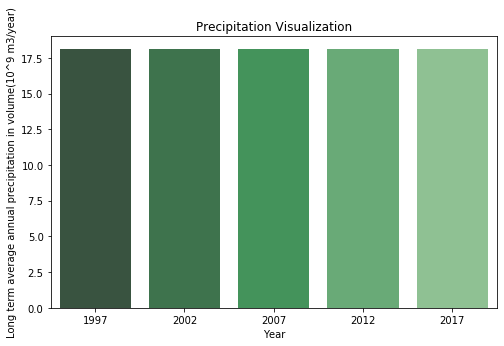

In [29]:
# precipitation visualization
f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8,5))  
pal = sns.color_palette("Greens_d", len(df['Long-term_average_annual_precipitation_in_volume']))
rank = df['Long-term_average_annual_precipitation_in_volume'].argsort().argsort()
sns.barplot(x='Year',y='Long-term_average_annual_precipitation_in_volume',data=df,ax=ax1,palette=np.array(pal[::-1])[rank])

plt.title('Precipitation Visualization')

plt.xlabel("Year")
plt.ylabel("Long term average annual precipitation in volume(10^9 m3/year)")



Visualization of internal renewable water resources

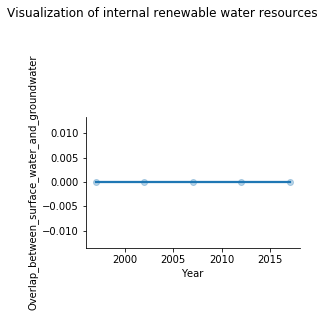

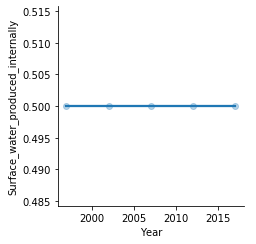

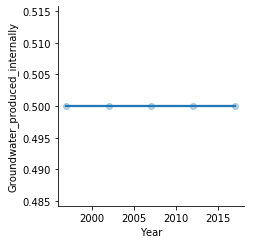

In [44]:
# visualization of overlap between surface water and ground water

# first plot
g=sns.FacetGrid(data=df,height=4)
g.map(sns.regplot,'Year','Overlap_between_surface_water_and_groundwater',scatter_kws={'alpha':0.3})
g.add_legend()

# add title
plt.subplots_adjust(top=0.6)
g.fig.suptitle("Visualization of internal renewable water resources")

# second plot
# visualization of surface water produced internally
g=sns.FacetGrid(data=df,height=3.5)
g.map(sns.regplot,'Year','Surface_water_produced_internally',scatter_kws={'alpha':0.3})
g.add_legend()

# third plot
# visualization of ground water produced internally
g=sns.FacetGrid(data=df,height=3.5)
g.map(sns.regplot,'Year','Groundwater_produced_internally',scatter_kws={'alpha':0.3})
g.add_legend()




Visualization of External renewable water resources


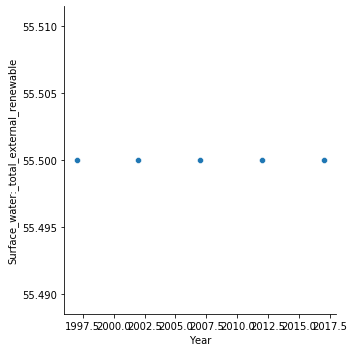

In [3]:
# visualization of surface water: total external renewable
sns.relplot(x="Year", y="Surface_water:_total_external_renewable", data=df);

> These visualizations show the water resources in Egypt which is from rainfall, groundwater, rivers and lakes and the quantity through the years till 2017 is approximately the same, it also shows that there is no groundwater pushed into the river.

2.What is the water withdrawal in agricultural, industrial, municipal compared to each other in Egypt?



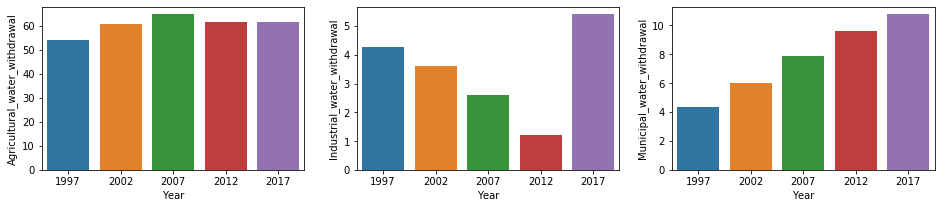

In [9]:
# visualization of withdrawal in agricultural, industrial, municipal
# figure size
plt.figure(figsize = [16, 3])
#add figure title
# LEFT plot
plt.subplot(1, 3, 1)
sns.barplot(data = df, x = 'Year', y = 'Agricultural_water_withdrawal')
# middle plot
plt.subplot(1, 3, 2)
sns.barplot(data = df, x = 'Year', y = 'Industrial_water_withdrawal')
# right plot
plt.subplot(1, 3, 3)
sns.barplot(data = df, x = 'Year', y = 'Municipal_water_withdrawal')


> Those visualizations show that the withdrawal in agriculture is the greatest then in municipal(direct use by the population) then in industrial, and also the withdrawal is increasing by time.

3.How much water we use in agriculture's products?


C:\Users\EL7md\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\EL7md\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\EL7md\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\EL7md\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\EL7md\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


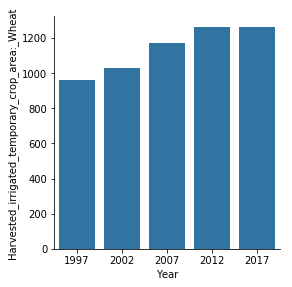

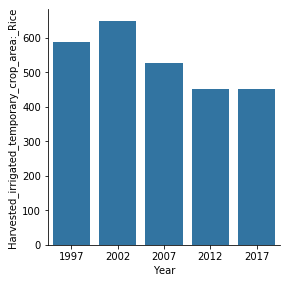

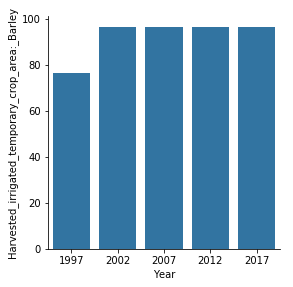

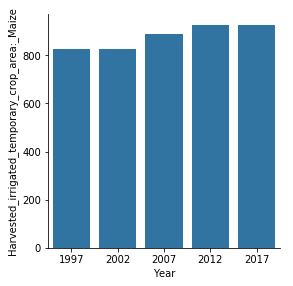

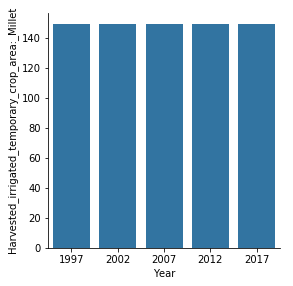

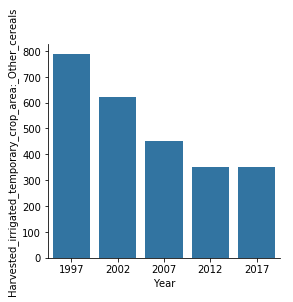

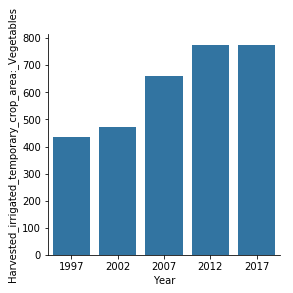

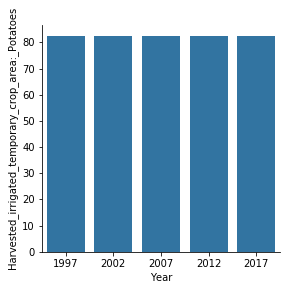

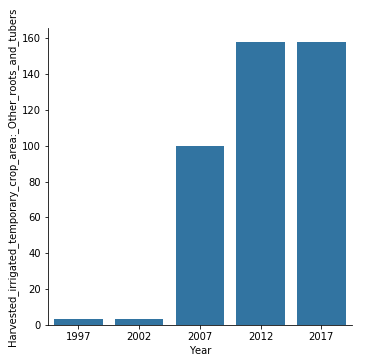

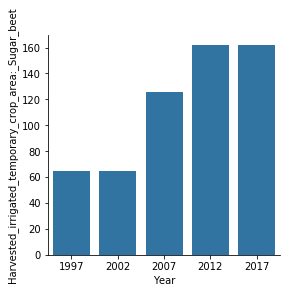

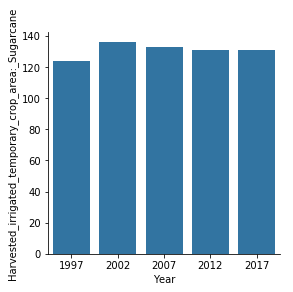

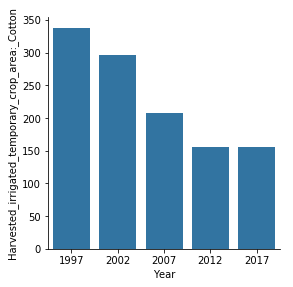

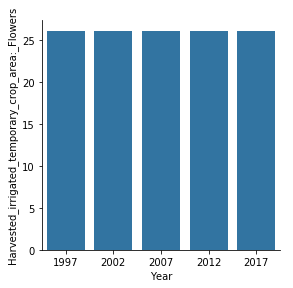

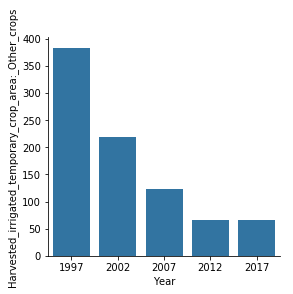

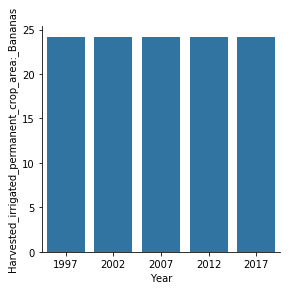

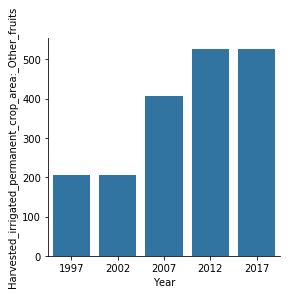

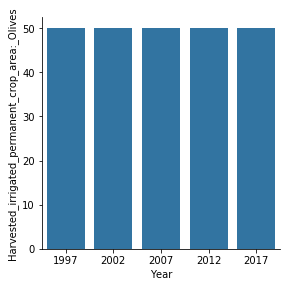

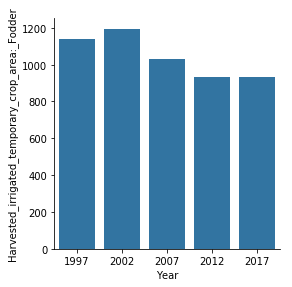

In [14]:
# visualization of agriculture's products
# visualization of wheat
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Wheat')
g.add_legend()
# visualization of rice
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Rice')
g.add_legend()
# visualization of Barley
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Barley')
g.add_legend()
# visualization of Maize
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Maize')
g.add_legend()
# visualization of Millet
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Millet')
g.add_legend()
# visualization of cereals
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Other_cereals')
g.add_legend()
# visualization of Vegetables
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Vegetables')
g.add_legend()
# visualization of Potatoes
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Potatoes')
g.add_legend()
# visualization of Other roots and tubers
g=sns.FacetGrid(data=df,height=5)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Other_roots_and_tubers')
g.add_legend()
# visualization of Sugar beet
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Sugar_beet')
g.add_legend()
# visualization of Sugarcane
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Sugarcane')
g.add_legend()
# visualization of Cotton
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Cotton')
g.add_legend()
# visualization of Flowers
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Flowers')
g.add_legend()
# visualization of Other crops
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Other_crops')
g.add_legend()
# visualization of Bananas
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_permanent_crop_area:_Bananas')
g.add_legend()
# visualization of Other fruits
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_permanent_crop_area:_Other_fruits')
g.add_legend()
# visualization of Olives
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_permanent_crop_area:_Olives')
g.add_legend()
# visualization of Fodder
g=sns.FacetGrid(data=df,height=4)
g.map(sns.barplot,'Year','Harvested_irrigated_temporary_crop_area:_Fodder')
g.add_legend()



> Those visualization show that there is increasing, stable, decreasing over years in harvested irrigated area for the crop:
- Icreasing like in: Wheat, maize, vegetables, fruits, sugar beet and other roots&tubers respectively.
- Stable like in: Fodder, sugarcane, potatoes, olives, flowers respectively.
- Decreasing like in: rice, other cereals, cotton respectively.

> Those visualization also show that :
- wheat, Fodder, maize, vegetables, fruits, rice and other cereals respectively take a great amount of harvested irrigated area.

4.How much rainfall water, flood and groundwater we use and How we can store it?


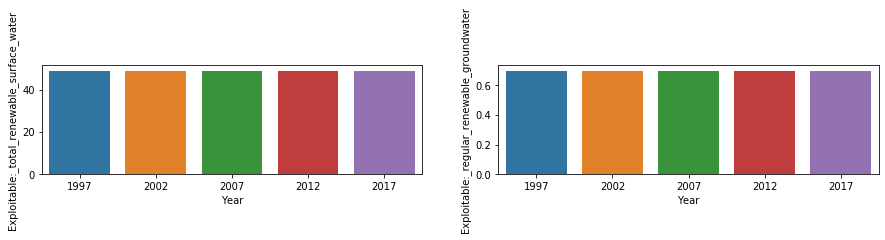

In [28]:
# visualization of Exploitable: total renewable surface water, Exploitable: regular renewable groundwater through years
# figure size
plt.figure(figsize = [15, 2])
#add figure title
# LEFT plot
plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'Year', y = 'Exploitable:_total_renewable_surface_water')
# right plot
plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'Year', y = 'Exploitable:_regular_renewable_groundwater')




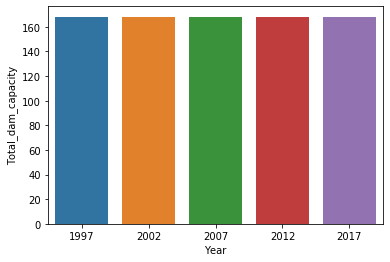

In [29]:
# visualization of dam capacity
sns.barplot(data = df, x = 'Year', y = 'Total_dam_capacity')


> Those visualizations show the Exploitable water sources which are from rivers, floods and groundwater, their amounts through years is stable, and also the capacity of the dam can store them.

5.How pollution affects water consumption?


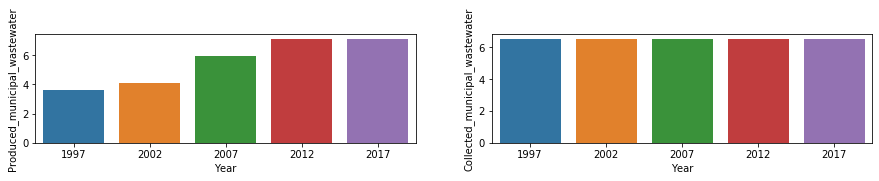

In [3]:
# visualization of Produced municipal wastewater and Collected municipal wastewater over years
# figure size
plt.figure(figsize = [15, 2])
#add figure title
# LEFT plot
plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'Year', y = 'Produced_municipal_wastewater')
# right plot
plt.subplot(1, 2, 2)
sns.barplot(data = df, x = 'Year', y = 'Collected_municipal_wastewater')




> Those visualizations show that the Produced municipal wastewater is increasing through years, and the Collected municipal wastewater is still stable.

<a id='conclusions'></a>
## Conclusions

**After those ways of analysis i can conclude the following:**

1. The water resources in Egypt is rainfall, groundwater, rivers and lakes.
2. The withdrawal in agriculture is very great and agriculture's crops consume a great amount of water.
3. There are Exploitable water sources from groundwater, rainfall, flood that can be stored in the dam.
4. There is an increase in Produced municipal wastewater through years, and that will affect the Exploitable water we use and agriculture.
